# Importer les bibliothèques

In [4]:
import pandas as pd

# 2. Importation de l'ensemble de données

In [5]:
data = pd.read_csv('heart.csv')

# 3. Prendre soin des valeurs manquantes

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

True

In [9]:
data = data.drop_duplicates()

In [10]:
data_dup = data.duplicated().any()

In [11]:
data_dup

False

# 5-Traitement des données

In [12]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6. Encodage des données catégorielles

In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [17]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 7. Feature 

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 8. Diviser l'ensemble de données en ensemble de formation et ensemble de test

In [23]:
X = data.drop('target',axis=1)

In [24]:
y = data['target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [27]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 9. Logistic Regression

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Hasna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred1 = log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred1)

0.7704918032786885

### 10. SVC

In [34]:
from sklearn import svm

In [35]:
svm = svm.SVC()

In [36]:
svm.fit(X_train,y_train)

SVC()

In [37]:
y_pred2 = svm.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred2)

0.5573770491803278

### 11. KNeighbors Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred3=knn.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred3)

0.639344262295082

In [44]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [45]:
score

[0.5573770491803278,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6229508196721312,
 0.6721311475409836,
 0.6065573770491803,
 0.6065573770491803,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.5573770491803278,
 0.5901639344262295,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.5573770491803278,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295]

In [47]:
import matplotlib.pyplot as plt

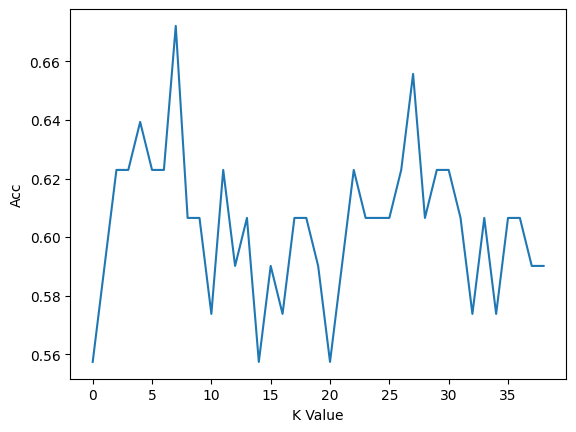

In [48]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [49]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

### 12. Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4= dt.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

### 13. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5= rf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.7868852459016393

### 14. Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()

In [63]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6 = gbc.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.7540983606557377

In [66]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [68]:
final_data

,Models,ACC
0,LR,77.049180
1,SVM,55.737705
2,KNN,63.934426
3,DT,73.770492
4,RF,78.688525
5,GB,75.409836


In [70]:
import seaborn as sns

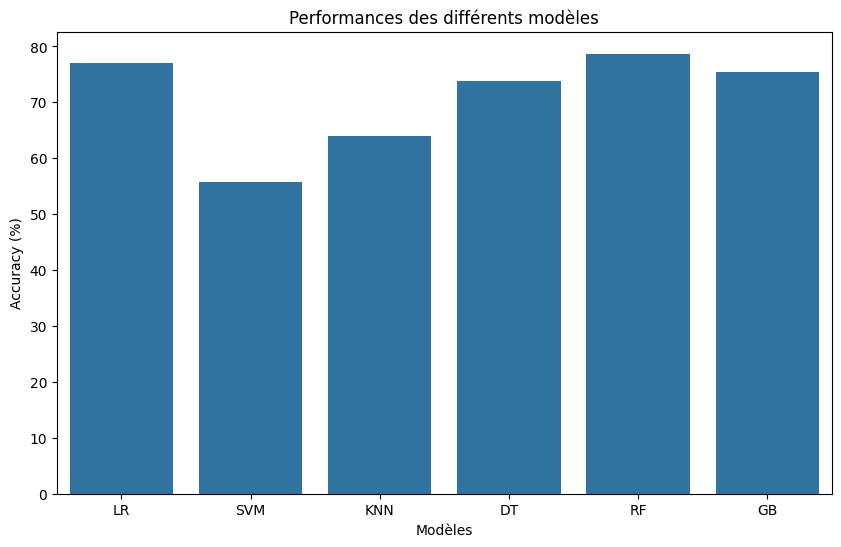

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un DataFrame pour l'exemple (remplacez ceci par votre DataFrame final_data réel)
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [77.049180, 55.737705, 63.934426, 73.770492, 78.688525, 75.409836]
})

# Créer le barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Performances des différents modèles')
plt.xlabel('Modèles')
plt.ylabel('Accuracy (%)')
plt.show()


In [74]:
X=data.drop('target',axis=1)
y=data['target']

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# 15. Prédiction sur les nouvelles données

In [77]:
import pandas as pd

In [80]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [81]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [82]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ca
- cp
- exang
- fbs
- restecg
- ...
Feature names seen at fit time, yet now missing:
- ca_1
- ca_2
- ca_3
- ca_4
- cp_1
- ...


### 16. Save Model Using Joblib

In [83]:
import joblib

In [84]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [85]:
model = joblib.load('model_joblib_heart')

In [86]:
model.predict(new_data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ca
- cp
- exang
- fbs
- restecg
- ...
Feature names seen at fit time, yet now missing:
- ca_1
- ca_2
- ca_3
- ca_4
- cp_1
- ...


In [87]:
data.tail()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False
878,54,1,120,188,113,1.4,0,False,False,False,...,False,True,False,True,False,False,False,False,False,True
